In [51]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Conv2D, MaxPooling2D, Flatten
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical


Validation accuracy: 0.625
Validation f1-score: 0.5636363636363637


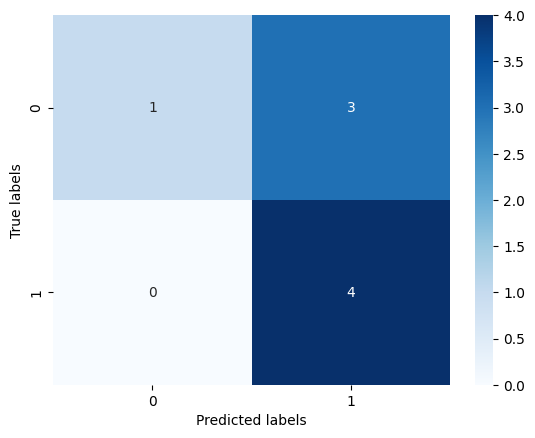

In [52]:
# This is the SVM model
def data_generator(data_dir, batch_size):
    filenames = [filename for filename in os.listdir(data_dir) if filename.endswith('.npy')]
    num_batches = len(filenames) // batch_size
    
    class_to_int = {
        'movement_one': 0,
        'movement_two': 1,
        'movement_three': 2,
        'movement_four': 3
    }
    for i in range(num_batches):
        batch_filenames = filenames[i*batch_size: (i+1)*batch_size]
        batch_data = []
        batch_labels = []
        for filename in batch_filenames:
            data = np.load(os.path.join(data_dir, filename))
            label_str = '_'.join(filename.split('_')[:2])
            label_int = class_to_int[label_str]
            batch_data.append(data)
            batch_labels.append(label_int)
        yield np.array(batch_data), np.array(batch_labels)

# Step 1: Define the data generator
batch_size = 40
data_dir = '/Users/steve/Jupyter_Notebook/Training_Mel'
data_gen = data_generator(data_dir, batch_size)

# Step 2: Split the dataset into training and validation sets
data, labels = next(data_gen)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Step 3: Train an SVM model on the training set
model = SVC(kernel='rbf')
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Step 4: Evaluate the model on the validation set
acc = model.score(X_val.reshape(X_val.shape[0], -1), y_val)
print('Validation accuracy:', acc)

# Step 5: Calculate the f1-score on the validation set
y_pred = model.predict(X_val.reshape(X_val.shape[0], -1))
f1 = f1_score(y_val, y_pred, average='weighted')
print('Validation f1-score:', f1)

# Step 6: Create a confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [49]:
#This is the RNN Model

# Step 1: Define the data generator
batch_size = 40
data_dir = '/Users/steve/Jupyter_Notebook/Training_Mel'
data_gen = data_generator(data_dir, batch_size)

# Step 2: Split the dataset into training and validation sets
data, labels = next(data_gen)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Step 3: Define the RNN model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(4, activation='softmax'))

# Step 4: Compile and train the model on the training set
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
y_train = to_categorical(y_train, num_classes=4)  # One-hot encode the target labels
model.fit(X_train, y_train, epochs=5, batch_size=40)

# Step 5: Evaluate the model on the validation set
y_val = to_categorical(y_val, num_classes=4)  # One-hot encode the target labels
loss, acc = model.evaluate(X_val, y_val)
print('Validation accuracy:', acc)

# Step 6: Calculate the f1-score on the validation set
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
f1 = f1_score(y_val.argmax(axis=1), y_pred, average='weighted')
print('Validation f1-score:', f1)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 1.3852 - accuracy: 0.3125
Epoch 2/5
1/1 [==============================] - 0s 44ms/step - loss: 1.1901 - accuracy: 0.4688
Epoch 3/5
1/1 [==============================] - 0s 48ms/step - loss: 1.0886 - accuracy: 0.5312
Epoch 4/5
1/1 [==============================] - 0s 44ms/step - loss: 1.0214 - accuracy: 0.6562
Epoch 5/5
1/1 [==============================] - 0s 284ms/step - loss: 1.0002 - accuracy: 0.6250
Validation accuracy: 0.625
1/1 [==============================] - 0s 239ms/step
Validation f1-score: 0.6190476190476191
